In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from scipy.stats import boxcox
import warnings
from sklearn.exceptions import ConvergenceWarning

In [552]:
# Ignore warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Task 1: Choose a Dataset

In [553]:
# Load the dataset
df = pd.read_csv('/Users/amalalsager/Desktop/CustomerChurn.csv')

In [554]:
# Display the first few rows of the dataset
print('Data shape:', df.shape)
print('First few rows of the dataset:\n', df.head())

Data shape: (7043, 21)
First few rows of the dataset:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechS

In [555]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Task 2: Data Pre-processing

In [556]:
# 1. Missing Values Analysis
print('Missing Values:\n', df.isnull().sum())

# 2. Check for duplicate rows
print('\nDuplicated Rows:', df.duplicated().sum())

# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of missing rows
missing_rows = df.isnull().any(axis=1).sum()

# 3. Calculate the percentage of missing rows
percentage_missing_rows = (missing_rows / total_rows) * 100
print("\nPercentage of missing rows: {:.2f}%".format(percentage_missing_rows))

Missing Values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Duplicated Rows: 0

Percentage of missing rows: 0.16%


In [557]:
# Removing missing rows
df.dropna(inplace=True)
print('\nData shape after dropping missing values:', df.shape)


Data shape after dropping missing values: (7032, 21)


# Task 3: Exploratory Data Analysis

Percentage of churn: 26.58%


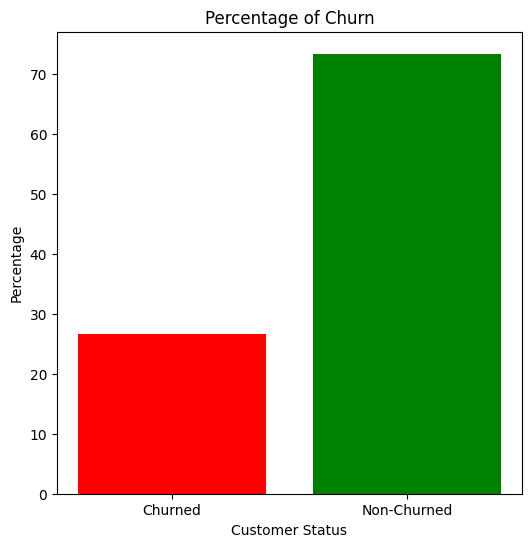

In [559]:
#1. Count the number of churned customers
churned_customers = df[df['Churn'] == 'Yes']
num_churned_customers = len(churned_customers)

# Calculate the total number of customers
total_customers = len(df)

# Calculate the percentage of churned customers
percentage_churn = (num_churned_customers / total_customers) * 100
print(f"Percentage of churn: {percentage_churn:.2f}%")

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(['Churned', 'Non-Churned'], [percentage_churn, 100 - percentage_churn], color=['red', 'green'])
plt.title('Percentage of Churn')
plt.xlabel('Customer Status')
plt.ylabel('Percentage')
plt.ylim() 
plt.show()

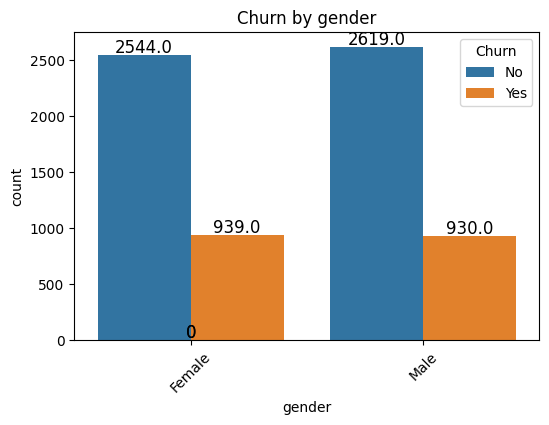

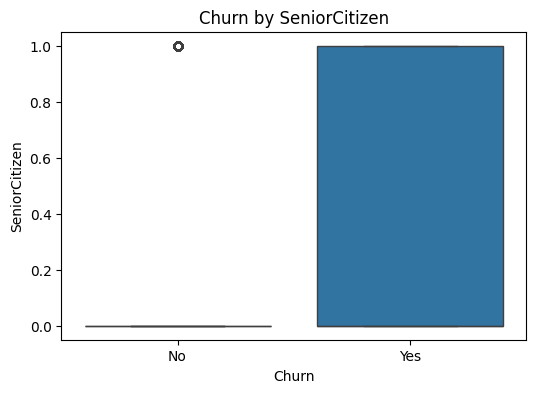

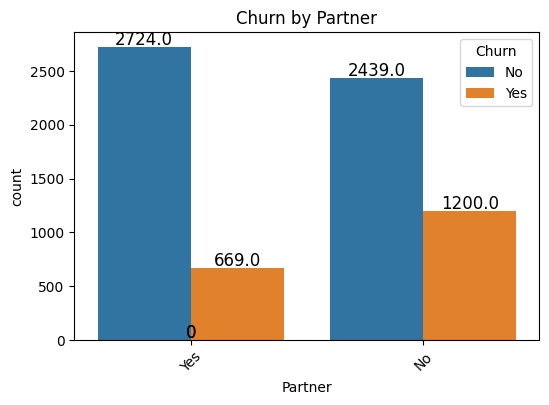

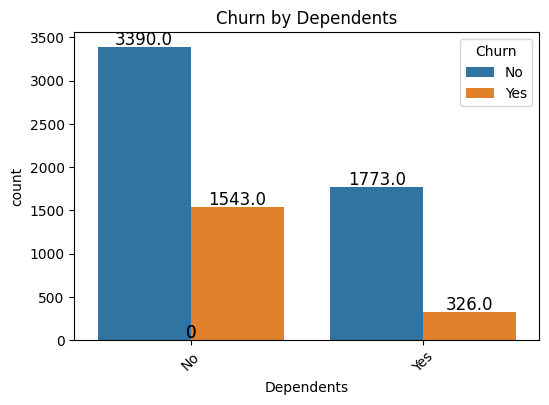

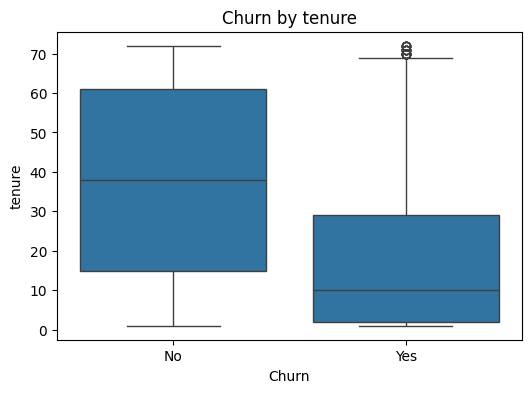

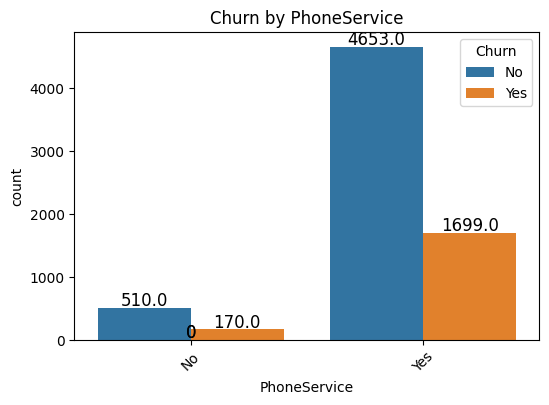

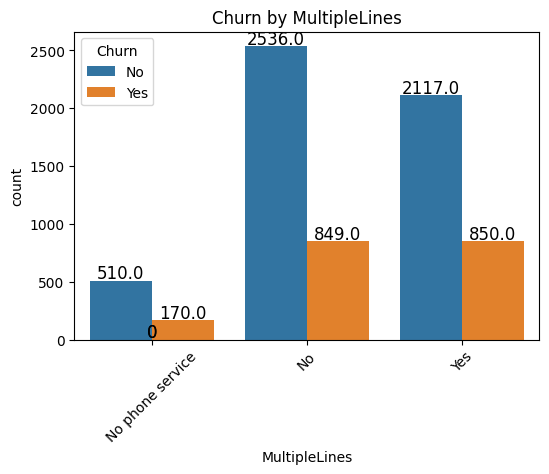

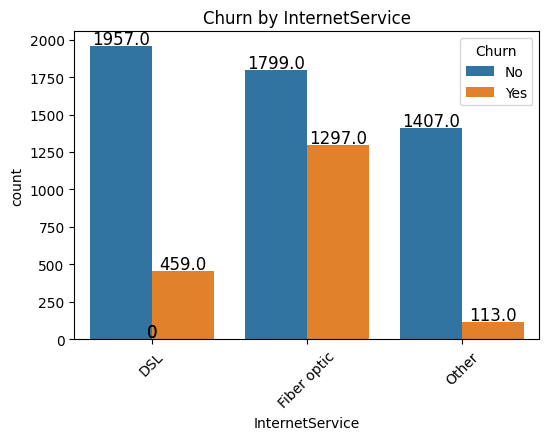

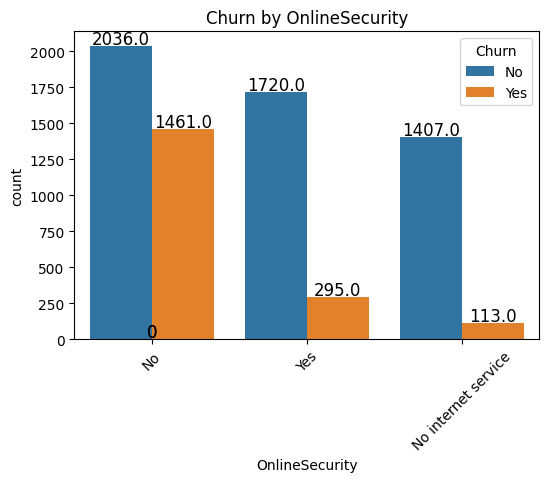

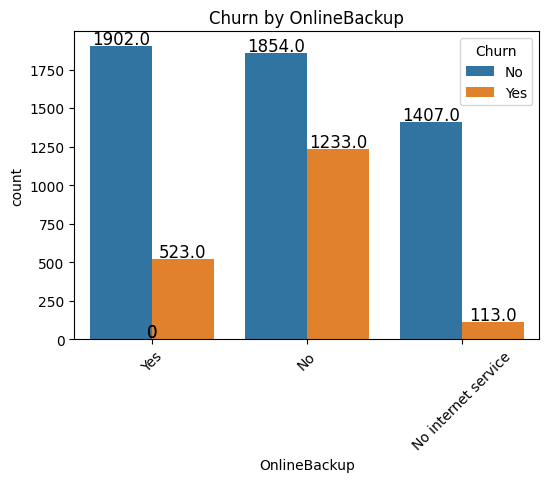

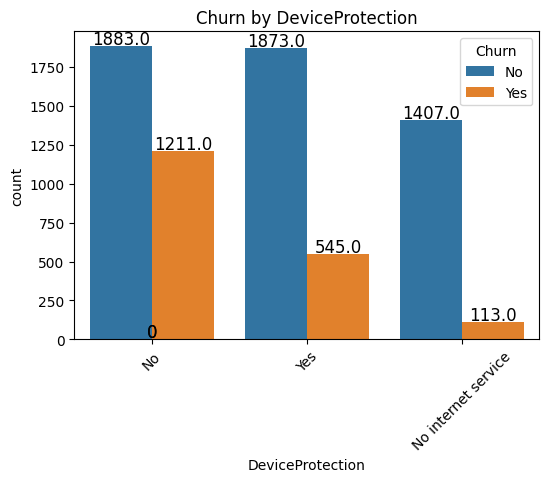

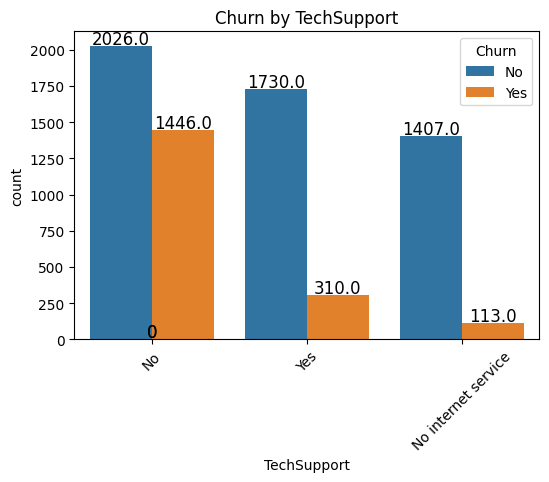

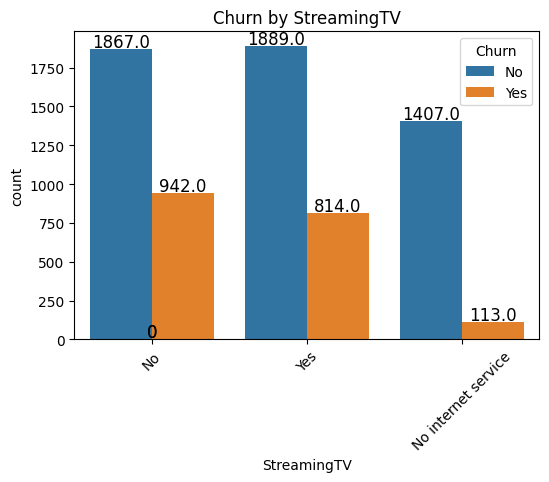

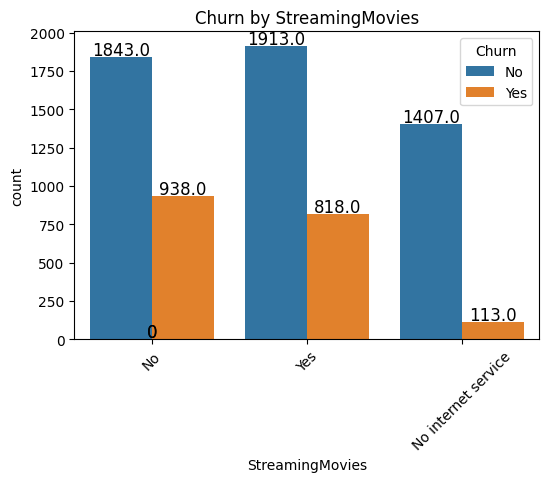

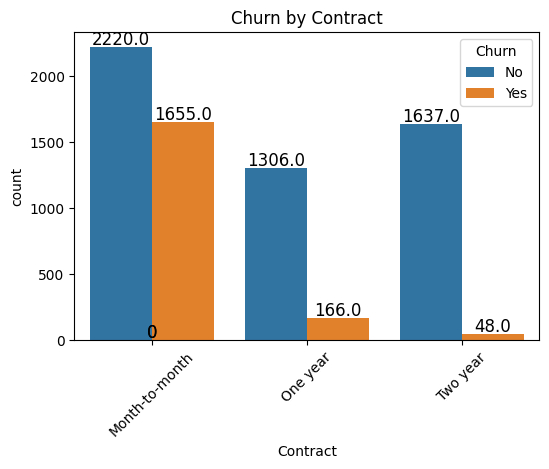

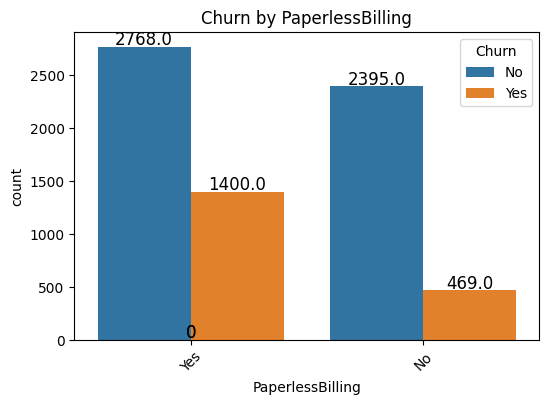

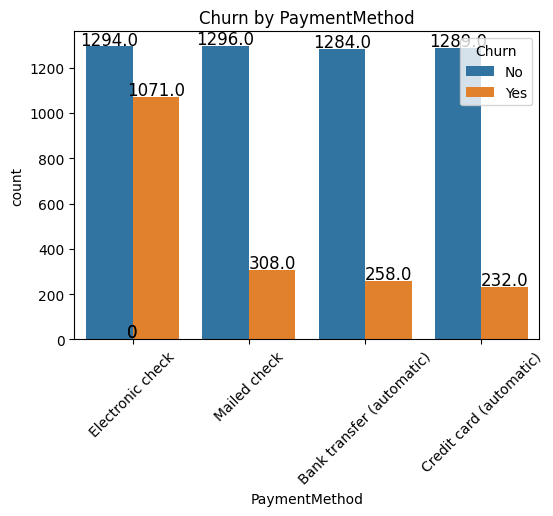

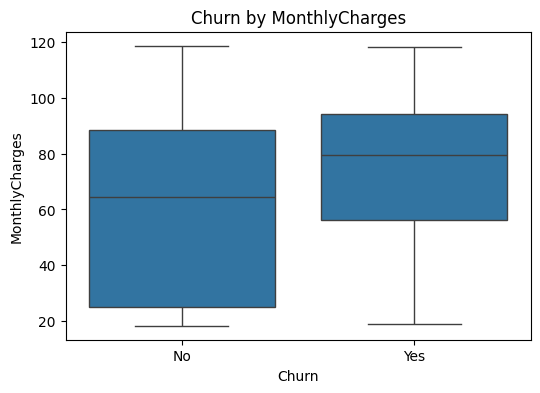

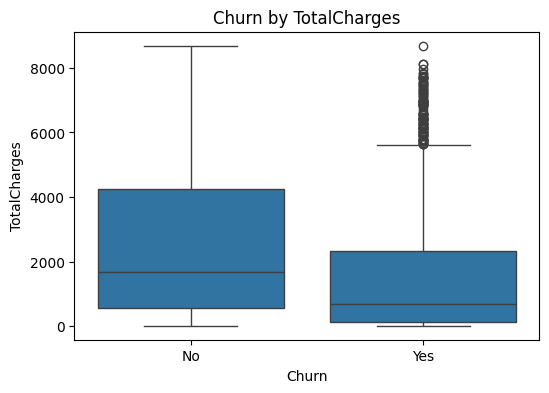

In [560]:
# 2. Get the list of columns related to churn (excluding the 'Churn' and 'customerID')
churn_related_columns = [col for col in df.columns if col not in ['Churn', 'customerID']]

# Iterate over each churn-related column
for col in churn_related_columns:
    if df[col].dtype == 'object':  # Categorical variables
        plt.figure(figsize=(6, 4))
        # Replace 'No' with 'Other' in the 'InternetService' column
        if col == 'InternetService':
            df[col] = df[col].replace({'No': 'Other'})
        ax = sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'Churn by {col}')
        plt.xticks(rotation=45)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')
        plt.show()
    else:  # Numerical variables
        plt.figure(figsize=(6, 4))
        ax = sns.boxplot(x='Churn', y=col, data=df)
        plt.title(f'Churn by {col}')
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .6))
        plt.show()

In [561]:
# 3. Summary statistics and potential outliers
print('Summary statistics for all variables:\n',df.describe())

Summary statistics for all variables:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [562]:
# 4. Outlier Detection using Z-score
# Iterate over each column for outlier detection
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  
        # Calculate z-scores for the column
        z_scores = np.abs(stats.zscore(df[column]))
        
        # Set the threshold for outlier detection
        threshold = 3
        
        # Find the indices of outliers
        outliers_indices = np.where(z_scores > threshold)[0]
        
        # Print information about outliers
        if len(outliers_indices) > 0:
            print(f"Outliers indices for {column}: {outliers_indices}")

In [563]:
# 5. Outlier Detection using IQR
# Define the numeric columns in the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[numeric_df].quantile(0.25)
Q3 = df[numeric_df].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outlier_indices = ((df[numeric_df] < lower_bound) | (df[numeric_df] > upper_bound)).any(axis=1)

# Print indices of outlier rows
print("Indices of outlier rows based on IQR method:")
print(df[outlier_indices].index)

# Create a single figure with subplots
plt.figure(figsize=(10, 8))

Indices of outlier rows based on IQR method:
Index([  20,   30,   31,   34,   50,   52,   53,   54,   55,   57,
       ...
       6993, 7007, 7008, 7010, 7015, 7023, 7029, 7031, 7032, 7041],
      dtype='int64', length=1142)


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

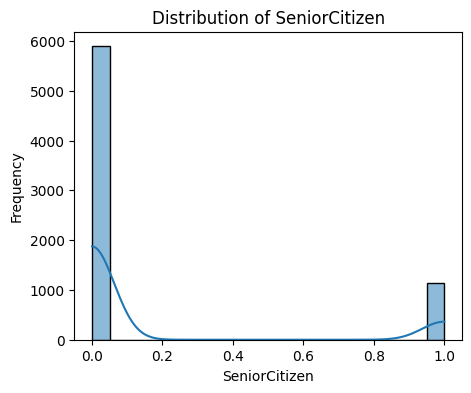

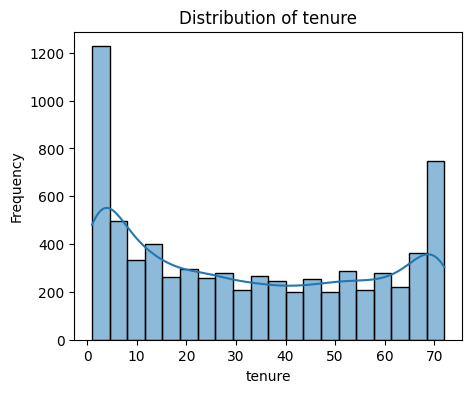

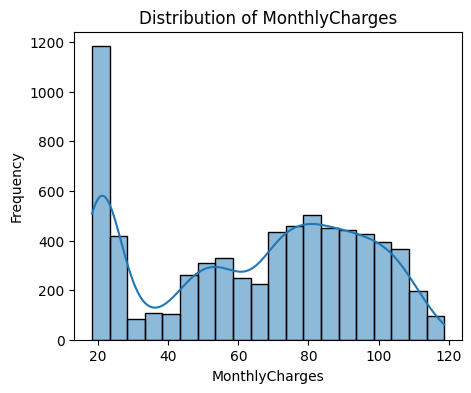

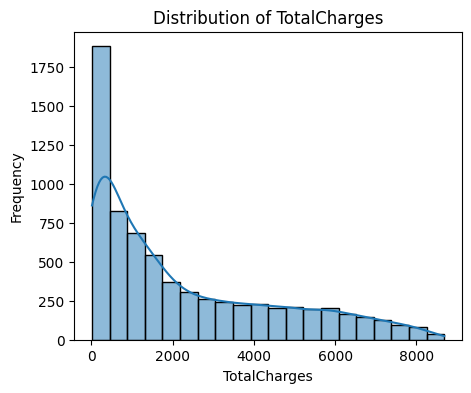

In [564]:
# 6. Data Visualization
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Histograms of all numeric variables
for column in numeric_df.columns:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Correlation Matrix:
                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


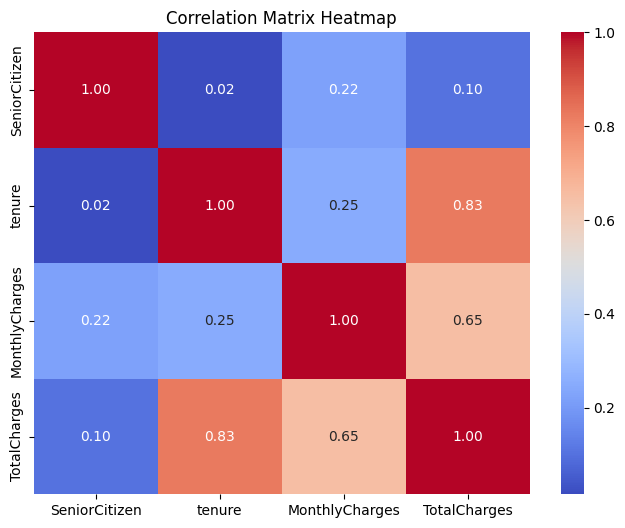

In [565]:
# 7. Calculate the correlation matrix only for numeric columns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_df].corr() 

print('Correlation Matrix:\n', correlation_matrix)

# Visualize the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Task 4: Build Classification/Clustering/Regression model development

/var/folders/bl/p7qwvnc14ls64sk1zz_hzy1w0000gn/T/ipykernel_45616/4153634135.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  stat, p = stats.shapiro(df[column])


Shapiro-Wilk test for SeniorCitizen: Statistics=0.444, p-value=0.000
Shapiro-Wilk test for tenure: Statistics=0.904, p-value=0.000
Shapiro-Wilk test for MonthlyCharges: Statistics=0.921, p-value=0.000
Shapiro-Wilk test for TotalCharges: Statistics=0.860, p-value=0.000


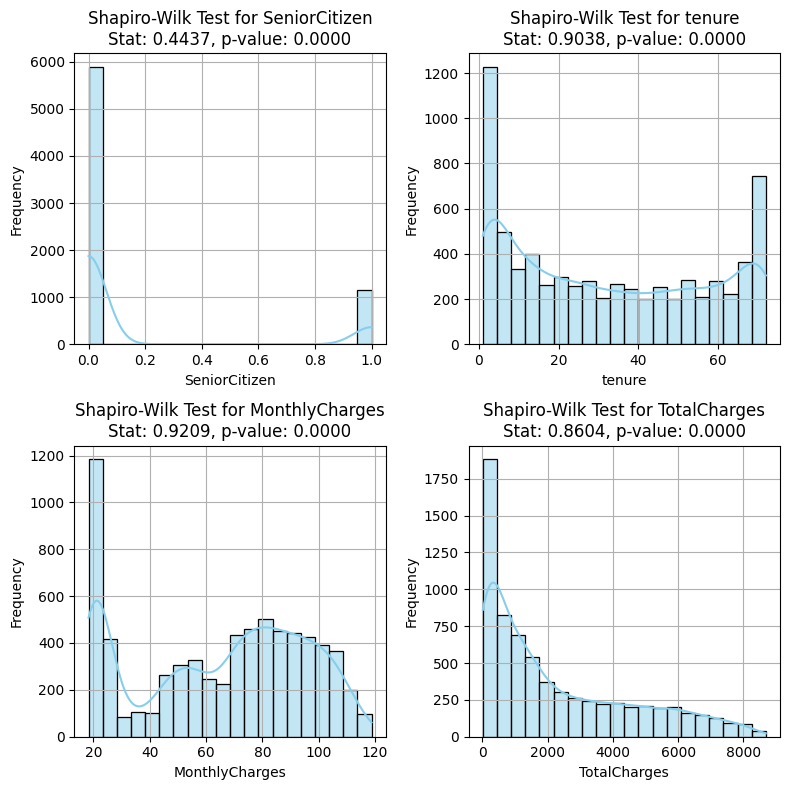

In [566]:
# 1. Perform Shapiro-Wilk test for normality
normality_test_results = {}
for column in numeric_df:
    stat, p = stats.shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}: Statistics={stat:.3f}, p-value={p:.3f}")
    normality_test_results[column] = {'Statistic': stat, 'p-value': p}

# Graphically represent the normality test results
plt.figure(figsize=(8, 8))
for i, (column, results) in enumerate(normality_test_results.items(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Shapiro-Wilk Test for {column}\nStat: {results["Statistic"]:.4f}, p-value: {results["p-value"]:.4f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [567]:
# Other test type, Kolmogorov-Smirnov Test
for column in numeric_df:
    kstest_statistic, kstest_pvalue = stats.kstest(df[column], 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: statistic={kstest_statistic}, p-value={kstest_pvalue}')

Kolmogorov-Smirnov Test for SeniorCitizen: statistic=0.5, p-value=0.0
Kolmogorov-Smirnov Test for tenure: statistic=0.8900769442748014, p-value=0.0
Kolmogorov-Smirnov Test for MonthlyCharges: statistic=1.0, p-value=0.0
Kolmogorov-Smirnov Test for TotalCharges: statistic=1.0, p-value=0.0


Shapiro-Wilk test for SeniorCitizen: Statistics=0.444, p-value=0.000
The data for SeniorCitizen is not normally distributed. Performing transformation...
Unable to perform Box-Cox transformation on SeniorCitizen due to non-positive values.
Shapiro-Wilk test for tenure: Statistics=0.904, p-value=0.000
The data for tenure is not normally distributed. Performing transformation...
Box-Cox transformation applied to tenure.


/var/folders/bl/p7qwvnc14ls64sk1zz_hzy1w0000gn/T/ipykernel_45616/4036638576.py:7: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  stat, p = stats.shapiro(df[column])


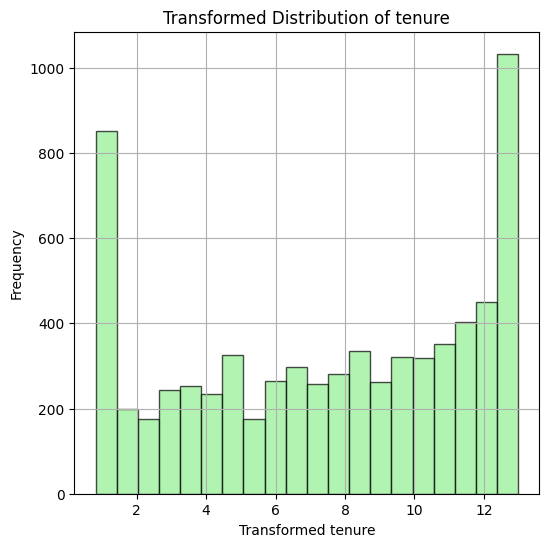

Shapiro-Wilk test for MonthlyCharges: Statistics=0.921, p-value=0.000
The data for MonthlyCharges is not normally distributed. Performing transformation...
Box-Cox transformation applied to MonthlyCharges.


/var/folders/bl/p7qwvnc14ls64sk1zz_hzy1w0000gn/T/ipykernel_45616/4036638576.py:7: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  stat, p = stats.shapiro(df[column])


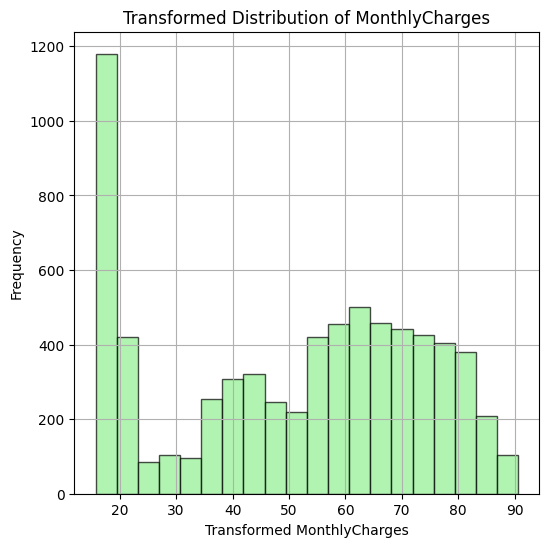

/var/folders/bl/p7qwvnc14ls64sk1zz_hzy1w0000gn/T/ipykernel_45616/4036638576.py:7: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  stat, p = stats.shapiro(df[column])


Shapiro-Wilk test for TotalCharges: Statistics=0.860, p-value=0.000
The data for TotalCharges is not normally distributed. Performing transformation...
Box-Cox transformation applied to TotalCharges.


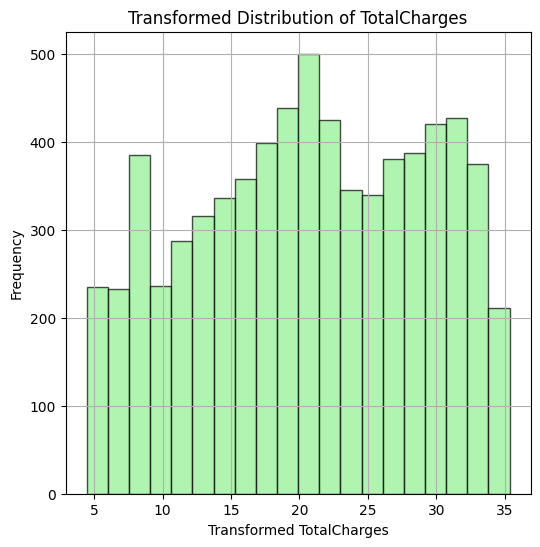


Descriptive Statistics for Transformed Data:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  \
count    7032.000000  7032.000000     7032.000000   7032.000000   
mean        0.162400    32.421786       64.798208   2283.300441   
std         0.368844    24.545260       30.085974   2266.771362   
min         0.000000     1.000000       18.250000     18.800000   
25%         0.000000     9.000000       35.587500    401.450000   
50%         0.000000    29.000000       70.350000   1397.475000   
75%         0.000000    55.000000       89.862500   3794.737500   
max         1.000000    72.000000      118.750000   8684.800000   

       tenure_boxcox  MonthlyCharges_boxcox  TotalCharges_boxcox  
count    7032.000000            7032.000000          7032.000000  
mean        7.528639              51.099509            20.628317  
std         4.071839              22.549136             8.378403  
min         0.812575              15.714466             4.463592  
25%         4.0

In [568]:
# 2. Transform the data by Box-Cox Transformation
# Step 1: Calculate descriptive statistics for the original data
original_stats = df.describe()

# Step 2: Transform the data by Box-Cox Transformation
for column in numeric_df:
    # Perform Shapiro-Wilk test for normality
    stat, p = stats.shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}: Statistics={stat:.3f}, p-value={p:.3f}")
    
    # If data is not normally distributed (p-value < 0.05), perform transformation
    if p < 0.05:
        print(f"The data for {column} is not normally distributed. Performing transformation...")
        
        # Perform Box-Cox transformation if possible (requires positive values)
        if df[column].min() > 0:  
            transformed_data, _ = stats.boxcox(df[column] + 1)  # Adding 1 to avoid zero values
            df[f'{column}_boxcox'] = transformed_data
            print(f'Box-Cox transformation applied to {column}.')
            
            # Visualize the transformed data distribution
            plt.figure(figsize=(6, 6))
            plt.hist(transformed_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
            plt.title(f'Transformed Distribution of {column}')
            plt.xlabel(f'Transformed {column}')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        else:
            print(f'Unable to perform Box-Cox transformation on {column} due to non-positive values.')

# Step 3: Calculate descriptive statistics for the transformed data
transformed_stats = df.describe()

print("\nDescriptive Statistics for Transformed Data:")
print(transformed_stats)


In [569]:
# 3. Decision Tree Classification
# Handle categorical features by Convert it  to numerical using label encoding
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])
# Select features and target variable
X = df.drop(['Churn', 'customerID'], axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classification
print('Decision Tree Classification:')
# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the classifier
dt_classifier.fit(X_train, y_train)
# Predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)
# Calculate accuracy and other evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
# ROC AUC Score (only applicable for binary classification)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

Decision Tree Classification:
Accuracy: 0.7263681592039801
ROC AUC Score: 0.6626913460094941
Confusion Matrix:
 [[825 208]
 [177 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



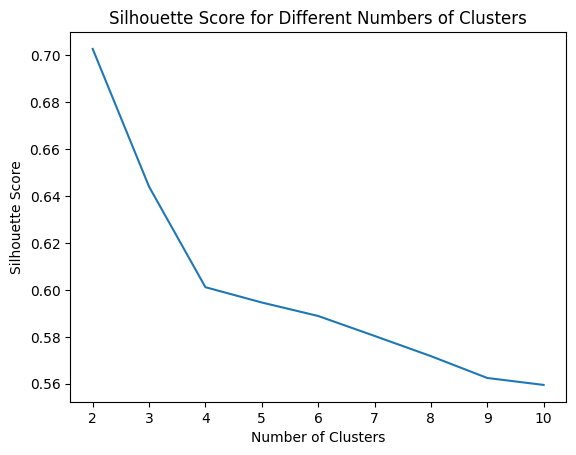

Decision Tree Classification:
Accuracy: 0.736318407960199
ROC AUC Score: 0.6617918838749088
Confusion Matrix:
 [[848 185]
 [186 188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.50      0.50       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



In [573]:
# 4. Decision Tree Classification with Clustering
# Perform clustering with different number of clusters
max_clusters = 10
silhouette_scores = []
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette scores
    silhouette_avg = np.mean(silhouette_samples(X, cluster_labels))
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Decision Tree Classification
# Handle categorical features by Convert it  to numerical using label encoding
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])
# Select features and target variable
X = df.drop(['Churn', 'customerID'], axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
X_train_clustered = kmeans.fit_transform(X_train)
X_test_clustered = kmeans.transform(X_test)

# Concatenate the original features with the cluster assignments
X_train_final = np.hstack((X_train, X_train_clustered))
X_test_final = np.hstack((X_test, X_test_clustered))

# Decision Tree Classification
print('Decision Tree Classification:')
# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the classifier
dt_classifier.fit(X_train_final, y_train)
# Predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_final)
# Calculate accuracy and other evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
# ROC AUC Score (only applicable for binary classification)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

In [486]:
# 5. Hyper-parameter tuning for Decision Tree Classification
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Instantiate the optimized model with best parameters
optimized_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the optimized model
optimized_dt_classifier.fit(X_train, y_train)

# Predictions on the test set using optimized model
y_pred_optimized = optimized_dt_classifier.predict(X_test)

# Evaluate the optimized model
print('\nOptimized Model Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_optimized))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_optimized))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_optimized))
print('Classification Report:\n', classification_report(y_test, y_pred_optimized))
print('\nBest Parameters:', best_params)
print('Best Score:', best_score)

# Compare with initial model
print('\nComparison with Initial Model:')
print('Initial Model Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Optimized Model Accuracy:', accuracy_score(y_test, y_pred_optimized))

# Perform statistical test to determine if the difference is significant
_, p_value = stats.ttest_rel(y_pred_dt, y_pred_optimized)
print('Statistical Significance (p-value):', p_value)
if p_value < 0.05:
    print('The improvement is statistically significant.')
else:
    print('The improvement is not statistically significant.')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Optimized Model Performance:
Accuracy: 0.7874911158493249
ROC AUC Score: 0.68214302353873
Confusion Matrix:
 [[937  96]
 [203 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7909333333333333

Comparison with Initial Model:
Initial Model Accuracy: 0.7277896233120114
Optimized Model Accuracy: 0.7874911158493249
Statistical Significance (p-value): 1.5095778146198228e-14
The improvement is statistically significant.


In [412]:
# 6. Logistic Regression using scikit-learn
# Separate features (X) and target variable (y)
X = df.drop(['Churn', 'customerID'], axis=1)  # Features
y = df['Churn']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
# Print confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

from sklearn.metrics import log_loss
# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on training data
y_pred_train = model.predict(X_train)

# Calculate the binary cross-entropy (log loss)
loss = log_loss(y_train, model.predict_proba(X_train))
print("Binary Cross-Entropy Loss:", loss)

Accuracy: 0.7889125799573561
Confusion Matrix:
 [[930 103]
 [194 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Binary Cross-Entropy Loss: 0.41137541597364696


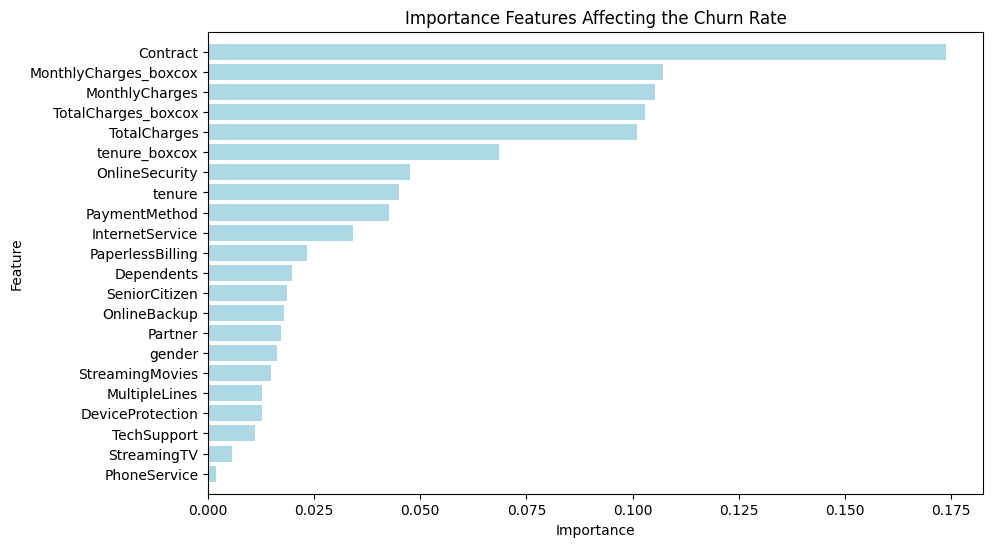

In [409]:
# 6. Get feature importances
importances = dt_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importance Features Affecting the Churn Rate')
plt.barh(range(X.shape[1]), importances[indices], align="center", color='lightblue')
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Reverse the y-axis to have highest importance at the top
plt.show()